In [190]:
#INTEGRANTES: LUISA MARÍA HERNÁNDEZ QUINTERO, CAROLINA TABORDA VARGAS
import pandas as pd
import numpy as np
from scipy import stats
import statistics
import matplotlib.pyplot as plt



In [191]:
#Análisis exploratorio de datos

#Promedio de la variable Max1R13_
df = pd.read_excel("FLIR_groups1and2.xlsx", header=2)
columna=df[['Max1R13_1', 'Max1R13_2', 'Max1R13_3', 'Max1R13_4']].mean(axis=1)
df_promedio = pd.DataFrame(columna, columns=['promedio_max'])
print(f"El promedio de Max1R13_ es: \n {df_promedio}")




El promedio de Max1R13_ es: 
       promedio_max
0          35.0300
1          34.5500
2          35.6525
3          35.2225
4          35.5450
...            ...
1015       35.6425
1016       35.9825
1017       36.4075
1018       35.8150
1019       35.7075

[1020 rows x 1 columns]


In [192]:
#Data frame con variables solicitadas 
list_1=df['aveOralM'].tolist()
list_2=df['Gender'].tolist()
list_3=df['Age'].tolist()
list_4=df['Ethnicity'].tolist()
list_5=df['T_atm'].tolist()
list_6=df['Humidity'].tolist()
list_7 = df['Cosmetics'].map({1: "Cosmético aplicado", 0: "No aplicado"}).tolist()
list_8=df_promedio['promedio_max'].tolist()

variables = {
    'aveOralM': list_1,
    'Gender': list_2,
    'Age': list_3,
    'Ethnicity': list_4,
    'T_atm': list_5,
    'Humidity': list_6,
    'Cosmetics': list_7,
    'promedio_Max1R13_': list_8,
}

# Esta parte del codigo solo es para mostrar el data frame con las variables a analizar, no se usa para el codigo 
print(pd.DataFrame(variables))


      aveOralM  Gender    Age                  Ethnicity  T_atm  Humidity  \
0        36.59    Male  41-50                      White   24.0      28.0   
1        37.19  Female  31-40  Black or African-American   24.0      26.0   
2        37.34  Female  21-30                      White   24.0      26.0   
3        37.09  Female  21-30  Black or African-American   24.0      27.0   
4        37.04    Male  18-20                      White   24.0      27.0   
...        ...     ...    ...                        ...    ...       ...   
1015     36.99  Female  21-25                      Asian   25.7      50.8   
1016     37.19  Female  21-25                      White   25.7      50.8   
1017     37.59  Female  18-20  Black or African-American   28.0      24.3   
1018     37.29    Male  26-30            Hispanic/Latino   25.0      39.8   
1019     37.19  Female  18-20                      White   23.8      45.6   

               Cosmetics  promedio_Max1R13_  
0                    NaN     

In [193]:
#Construcción de un DataFrame

#Tipos de datos: Variables numéricas y Variables categóricas

def valores_estadisticos(valores):
    # Convertir a numpy array por seguridad
    valores = np.array(valores)

    # Si no son numéricos (excepto moda), devolver NaN
    if not np.issubdtype(valores.dtype, np.number):
        media = mediana = sd = mad = varianza = iqr = cv = cvm = np.nan
        try:
            moda = statistics.mode(valores)
        except statistics.StatisticsError:
            moda = 'No única'
    else:
        media = np.mean(valores)
        mediana = np.median(valores)
        try:
            moda = statistics.mode(valores)
        except statistics.StatisticsError:
            moda = 'No única'
        sd = np.std(valores, ddof=1)
        mad = np.mean(np.abs(valores - np.mean(valores)))
        varianza = np.var(valores, ddof=1)
        iqr = np.percentile(valores, 75) - np.percentile(valores, 25)
        cv = sd / media if media != 0 else np.nan
        cvm = mad / media if media != 0 else np.nan

    return [media, mediana, moda, sd, mad, varianza, iqr, cv, cvm]
      
# Calculamos los valores estadísticos por variable
estadisticas = {nombre: valores_estadisticos(lista) for nombre, lista in variables.items()}

# Convertimos a DataFrame con los nombres de filas
estadisticas_df = pd.DataFrame(estadisticas, index=["Media", "Mediana", "Moda", "SD", "MAD", "Varianza", "IQR", "CV", "CVM"])

# Mostramos el resultado
print(estadisticas_df)


           aveOralM  Gender    Age Ethnicity      T_atm    Humidity  \
Media     37.028382     NaN    NaN       NaN  24.115392   28.723039   
Mediana   36.940000     NaN    NaN       NaN  24.000000   26.300000   
Moda      36.890000  Female  18-20     White  24.000000   30.000000   
SD         0.509502     NaN    NaN       NaN   1.336338   13.071627   
MAD        0.332741     NaN    NaN       NaN   0.956887   10.844331   
Varianza   0.259593     NaN    NaN       NaN   1.785798  170.867427   
IQR        0.362500     NaN    NaN       NaN   1.300000   18.600000   
CV         0.013760     NaN    NaN       NaN   0.055414    0.455092   
CVM        0.008986     NaN    NaN       NaN   0.039680    0.377548   

            Cosmetics  promedio_Max1R13_  
Media             NaN          35.596533  
Mediana           NaN          35.548750  
Moda      No aplicado          35.677500  
SD                NaN           0.574888  
MAD               NaN           0.418881  
Varianza          NaN          

Calculo del coeficiente de variación de los datos 

In [194]:
#Metodo de rangos intercuartiles para detectar datos atipicos  
def detectar_outliers(lista):
    datos = np.array(lista)
    
    # Calcular Q1, Q3 e IQR
    Q1 = np.percentile(datos, 25)
    Q3 = np.percentile(datos, 75)
    IQR = Q3 - Q1

    # Límites inferior y superior
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Detectar valores fuera del rango
    outliers = datos[(datos < limite_inferior) | (datos > limite_superior)]

    # Verificar si hay atípicos
    hay_atipicos = len(outliers) > 0
    cantidad = len(outliers)

    return outliers, hay_atipicos, cantidad
#Salida de los datos 
outliers_1, hay_atipicos_1, cantidad_1 = detectar_outliers(list_1)
print("Outliers encontrados en aveOralM  :", outliers_1)
print("¿Hay datos atípicos en aveOralM ?", hay_atipicos_1)
print("Cantidad de datos atípicos en aveOralM :", cantidad_1)

outliers_5, hay_atipicos_5, cantidad_5 = detectar_outliers(list_5)
print("Outliers encontrados en list_5:", outliers_5)
print("¿Hay datos atípicos en list_5?", hay_atipicos_5)
print("Cantidad de datos atípicos en list_5:", cantidad_5)

outliers_6, hay_atipicos_6, cantidad_6 = detectar_outliers(list_6)
print("Outliers encontrados en list_6:", outliers_6)
print("¿Hay datos atípicos en list_6?", hay_atipicos_6)
print("Cantidad de datos atípicos en list_6:", cantidad_6)

outliers_8, hay_atipicos_8, cantidad_8 = detectar_outliers(list_8)
print("Outliers encontrados en list_7:", outliers_8)
print("¿Hay datos atípicos en list_7?", hay_atipicos_8)
print("Cantidad de datos atípicos en list_7:", cantidad_8)



Outliers encontrados en aveOralM  : [37.79 36.14 35.99 37.79 37.99 38.69 38.54 38.59 36.09 37.79 38.09 37.99
 36.14 35.64 36.19 40.34 37.99 38.39 38.04 37.99 37.94 37.99 38.44 39.64
 35.94 36.19 36.19 38.84 38.49 37.89 38.29 38.44 37.74 35.99 37.94 36.19
 38.44 38.29 37.74 37.94 37.74 35.84 36.04 38.94 39.09 38.69 38.34 36.19
 37.94 36.19 36.19 36.09 39.84 39.59 38.29 37.69 35.54 38.29 38.84 38.64
 37.94 38.09 37.79 38.14 38.39 37.69 39.34 37.89 37.89 37.79 36.09 38.74
 37.74 38.14 38.49 38.69 38.54 37.79 39.14 37.99 37.74 38.24 37.94 37.74
 39.54 38.84 38.19 38.04 37.94 38.49 37.69 38.19 37.94 39.09 37.74 38.44
 39.24 38.14 38.94 37.89 37.94 37.89 37.94 38.39 37.94 37.69 38.74 37.79]
¿Hay datos atípicos en aveOralM ? True
Cantidad de datos atípicos en aveOralM : 108
Outliers encontrados en list_5: [27.  26.7 26.8 26.9 27.2 27.2 26.9 21.4 21.2 21.4 21.4 20.5 21.2 21.4
 21.2 21.3 20.8 20.6 21.  21.1 20.8 20.8 20.7 21.  21.1 20.6 20.2 20.3
 20.6 21.  21.  21.  21.3 26.8 26.8 27.  27.  27

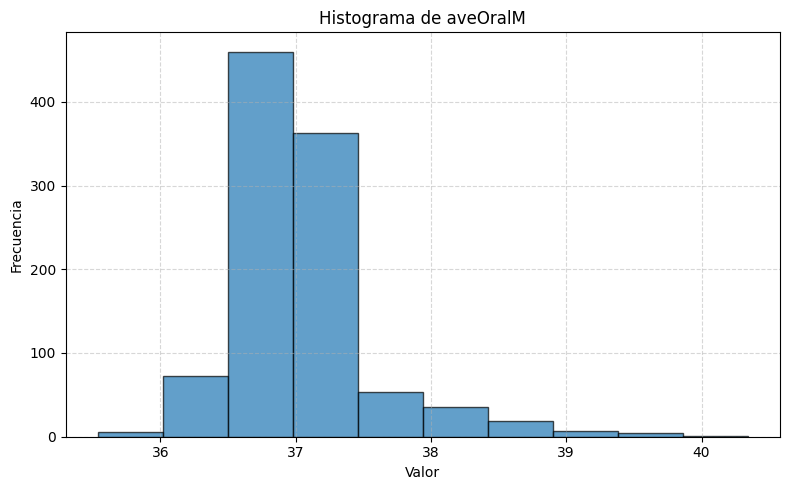

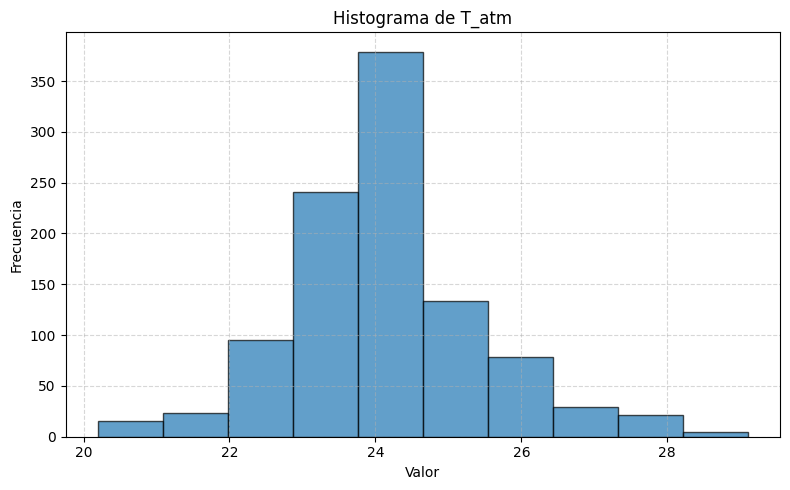

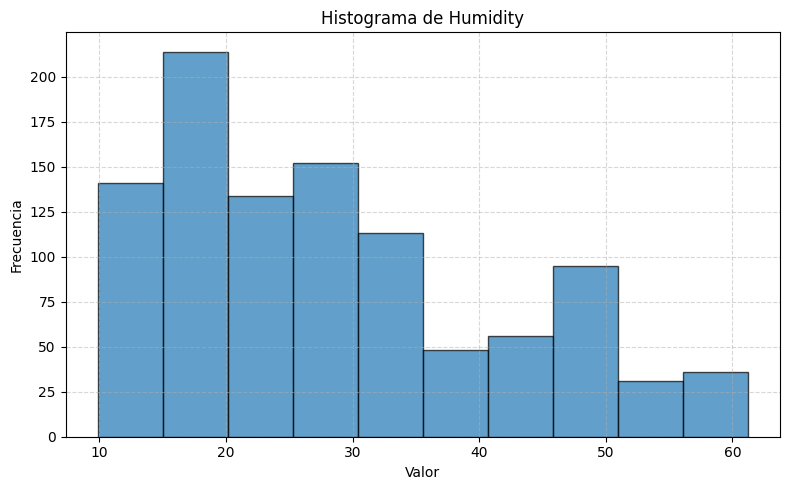

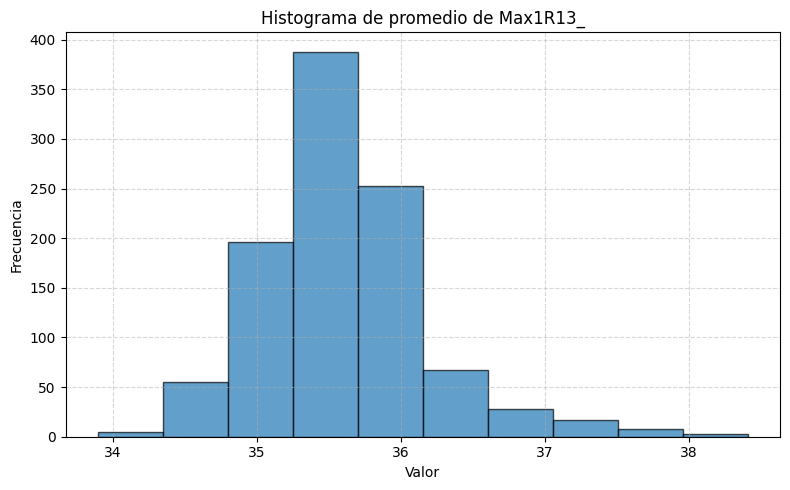

In [195]:
#Histogramas
import matplotlib.pyplot as plt

def graficar_histograma(datos, bins=10, titulo="Histograma", xlabel="Valor", ylabel="Frecuencia"):
    """
    Grafica un histograma a partir de una lista de datos.

    Parámetros:
    - datos: lista de valores numéricos
    - bins: número de divisiones del histograma (por defecto 10)
    - titulo: título del gráfico
    - xlabel: etiqueta del eje X
    - ylabel: etiqueta del eje Y
    """
    plt.figure(figsize=(8, 5))
    plt.hist(datos, bins=bins, edgecolor='black', alpha=0.7)
    plt.title(titulo)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()
    
graficar_histograma(list_1, bins=10, titulo="Histograma de aveOralM")
graficar_histograma(list_5, bins=10, titulo="Histograma de T_atm")
graficar_histograma(list_6, bins=10, titulo="Histograma de Humidity")
graficar_histograma(list_8, bins=10, titulo="Histograma de promedio de Max1R13_")


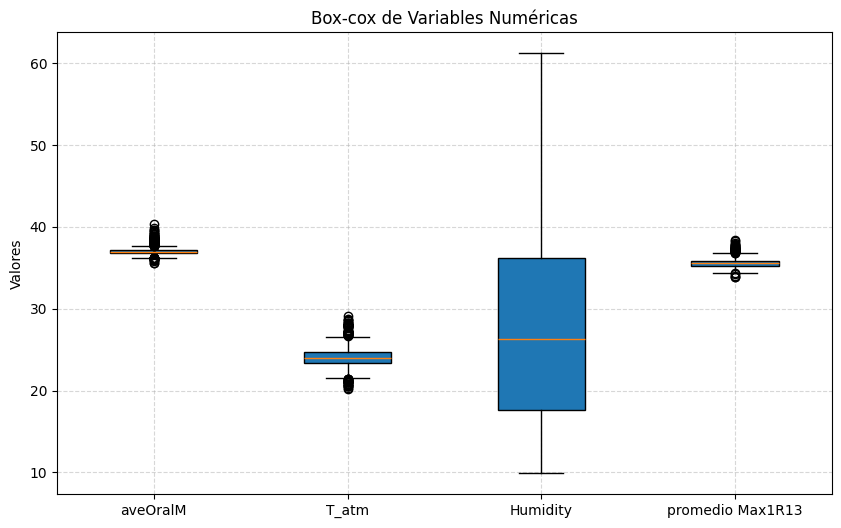

In [196]:
#Caja de bigotes 
# Supongamos que tus listas numéricas son estas:
variables = [
    list_1,  # aveOralM
    list_5,  # T_atm
    list_6,  # Humidity
    list_8   # promedio Max1R13
]

nombres = ['aveOralM', 'T_atm', 'Humidity', 'promedio Max1R13']

# Crear gráfico de cajas
plt.figure(figsize=(10, 6))
plt.boxplot(variables, labels=nombres, patch_artist=True)

plt.title("Box-cox de Variables Numéricas")
plt.ylabel("Valores")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

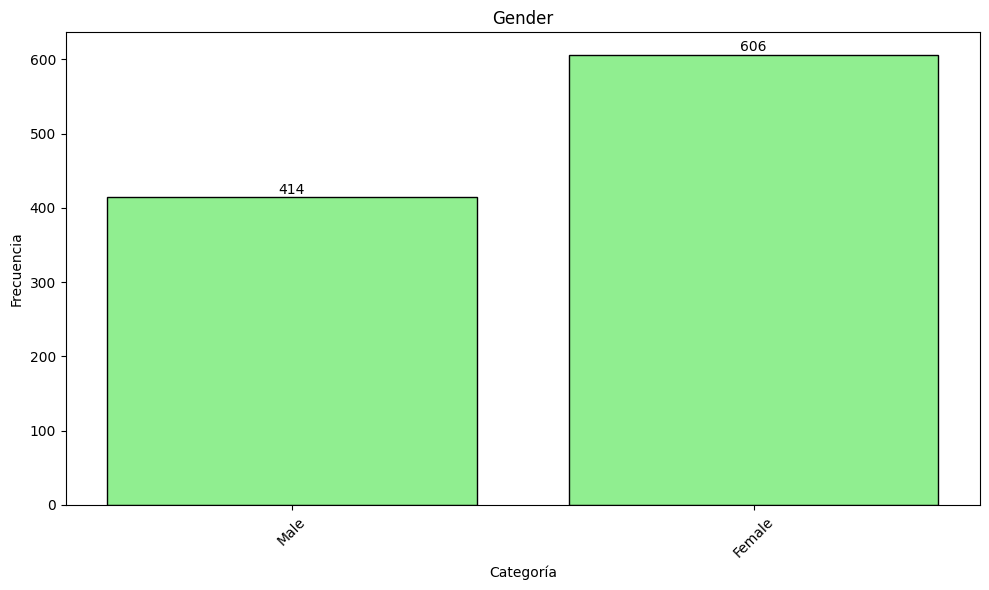

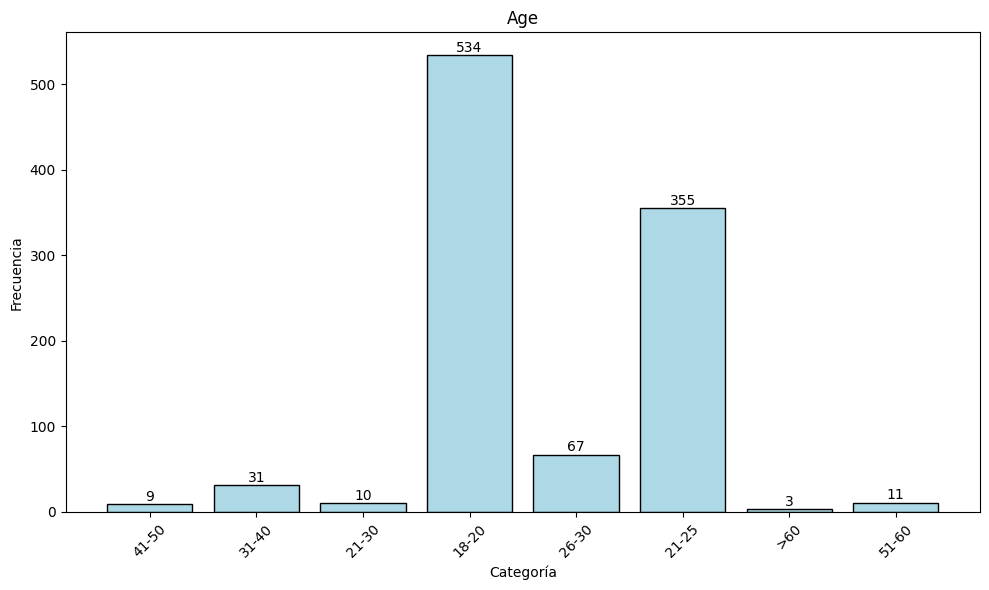

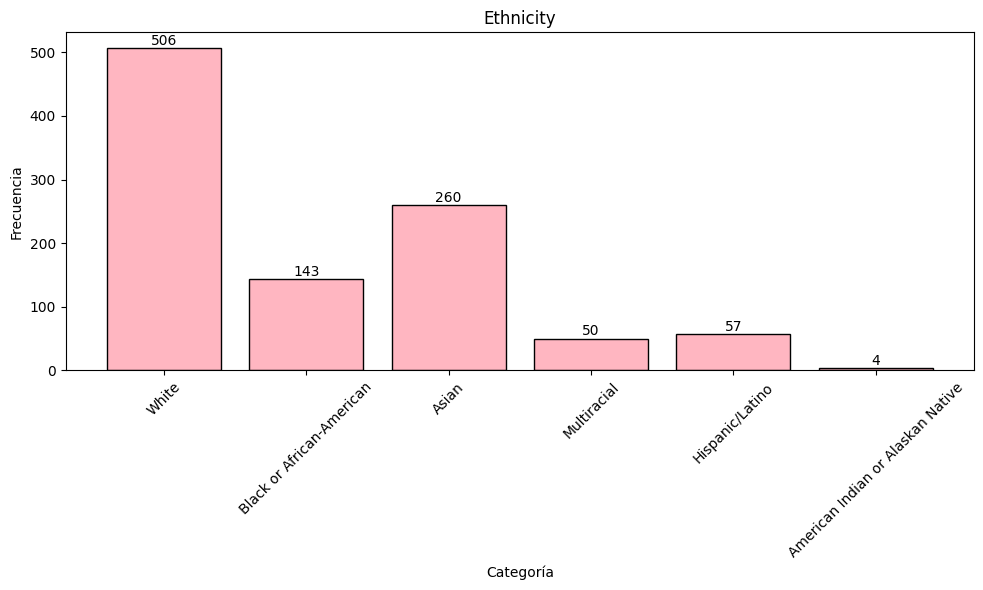

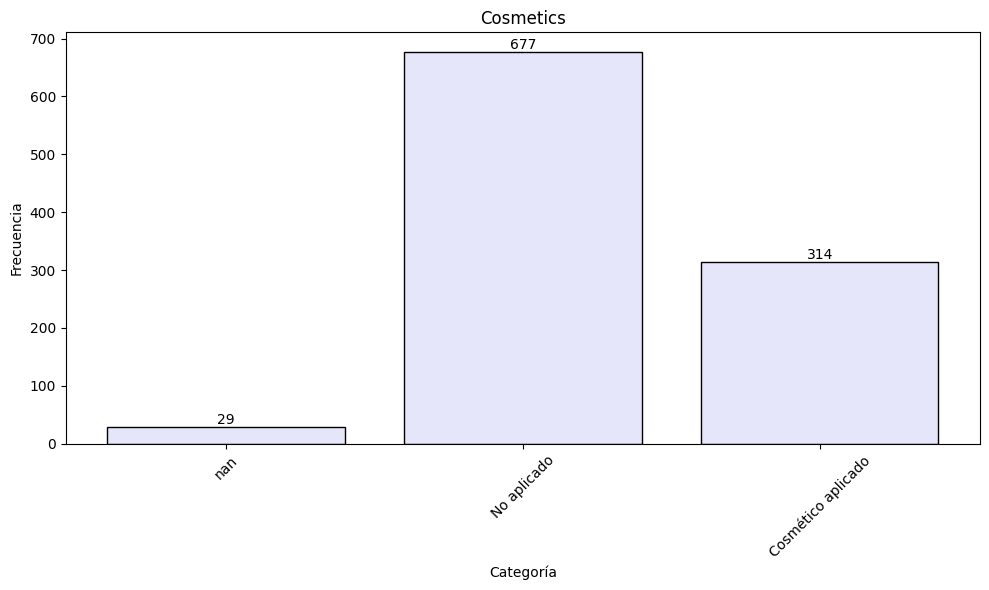

In [197]:
#Gráficos de barras
import matplotlib.pyplot as plt
from collections import Counter

def graficar_categorias_desde_lista(lista, titulo="Frecuencia por categoría", color='lightgreen'):
    """
    Genera una gráfica de barras para una lista de datos categóricos.
    """
    conteo = Counter(lista)
    
    categorias = list(conteo.keys())
    frecuencias = list(conteo.values())

    x = list(range(len(categorias)))  # convertir las categorías a índices numéricos

    plt.figure(figsize=(10, 6))
    plt.bar(x, frecuencias, color=color, edgecolor='black')
    plt.xticks(ticks=x, labels=categorias, rotation=45)
    plt.title(titulo)
    plt.xlabel("Categoría")
    plt.ylabel("Frecuencia")

    for i, valor in enumerate(frecuencias):
        plt.text(i, valor + 0.5, str(valor), ha='center', va='bottom', fontsize=10)

    plt.tight_layout()
    plt.show()

graficar_categorias_desde_lista(list_2, 'Gender',color='lightgreen' )
graficar_categorias_desde_lista(list_3, 'Age',color='lightblue' )
graficar_categorias_desde_lista(list_4, 'Ethnicity',color='lightpink' )
graficar_categorias_desde_lista(list_7, 'Cosmetics',color='lavender')

Matriz de correlación:
                   aveOralM     T_atm  Humidity  promedio_Max1R13_
aveOralM           1.000000  0.098663  0.063595           0.741902
T_atm              0.098663  1.000000  0.119270           0.275363
Humidity           0.063595  0.119270  1.000000           0.050884
promedio_Max1R13_  0.741902  0.275363  0.050884           1.000000


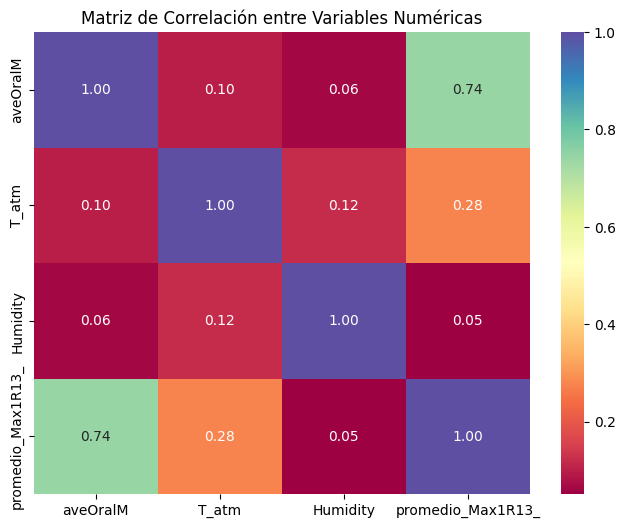

In [198]:
#Matriz de correlación
import seaborn as sns

variables = {
    'aveOralM': list_1,
    'T_atm': list_5,
    'Humidity': list_6,
    'promedio_Max1R13_': list_8,
}

# Convertir a DataFrame
df = pd.DataFrame(variables)

# Calcular matriz de correlación
matriz_corr = df.corr()

# Mostrar la matriz
print("Matriz de correlación:")
print(matriz_corr)

# Visualizar con mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_corr, annot=True, cmap='Spectral', fmt=".2f")
plt.title("Matriz de Correlación entre Variables Numéricas")
plt.show()

Punto 2 

In [206]:
#Codigo para obtener data frame de la poblacion
df_1 = pd.read_excel("FLIR_groups1and2.xlsx", header=2)
def promedio_data(df,  p, q, r, s):
    columna = df[[p, q, r, s]].mean(axis=1)
    return columna.tolist()

T_CRmax=promedio_data(df_1, "Max1R13_1", "Max1R13_2", "Max1R13_3", "Max1R13_4")
T_CLmax=promedio_data(df_1, "Max1L13_1", "Max1L13_2","Max1L13_3","Max1L13_4" )
T̅_CRR=promedio_data(df_1, "aveAllR13_1", "aveAllR13_2", "aveAllR13_3","aveAllR13_4" )
T̅_CRL=promedio_data(df_1, "aveAllL13_1", "aveAllL13_2", "aveAllL13_3","aveAllL13_4" )
T_CEmax=promedio_data(df_1, "canthiMax1", "canthiMax2", "canthiMax3","canthiMax4" )
T_FEmax=promedio_data(df_1,"T_FH_Max1","T_FH_Max2","T_FH_Max3","T_FH_Max4")
T_FCmax=promedio_data(df_1,"T_FHC_Max1","T_FHC_Max2","T_FHC_Max3","T_FHC_Max4")
T_max=promedio_data(df_1, "T_Max1","T_Max2","T_Max3","T_Max4")
T_Mmax=promedio_data(df_1,"T_OR_Max1","T_OR_Max2","T_OR_Max3","T_OR_Max4")
T_FC= promedio_data(df_1, "T_FHCC1", "T_FHCC2", "T_FHCC3","T_FHCC4" ) 
T_FR=promedio_data(df_1,"T_FHRC1", "T_FHRC2","T_FHRC3","T_FHRC4" ) 
T_FL=promedio_data(df_1, "T_FHLC1","T_FHLC2","T_FHLC3","T_FHLC4"  )
T_FB=promedio_data(df_1, "T_FHBC1","T_FHBC2","T_FHBC3","T_FHBC4")
T_FT=promedio_data(df_1, "T_FHTC1","T_FHTC2","T_FHTC3","T_FHTC4")

df_resultados = pd.DataFrame({  #data frame con el promedio de los valores del termografo 
    "T_CRmax": T_CRmax,
    "T_CLmax": T_CLmax,
    "T̅_CRR": T̅_CRR,
    "T̅_CRL": T̅_CRL,
    "T_CEmax": T_CEmax,
    "T_FEmax": T_FEmax,
    "T_FCmax": T_FCmax,
    "T_max": T_max,
    "T_Mmax": T_Mmax,
    "T_FC": T_FC,
    "T_FR": T_FR,
    "T_FL": T_FL,
    "T_FB": T_FB,
    "T_FT": T_FT
})
from tabulate import tabulate
print("Tabla de poblacion de datos pbtenidos por termografo:  \n")
print(tabulate(df_resultados, headers='keys', tablefmt='github', showindex=True))




Tabla de poblacion de datos pbtenidos por termografo:  

|      |   T_CRmax |   T_CLmax |   T̅_CRR |   T̅_CRL |   T_CEmax |   T_FEmax |   T_FCmax |   T_max |   T_Mmax |    T_FC |    T_FR |    T_FL |    T_FB |    T_FT |
|------|-----------|-----------|---------|---------|-----------|-----------|-----------|---------|----------|---------|---------|---------|---------|---------|
|    0 |   35.03   |   35.3775 | 34.4    | 34.9175 |   35.3775 |   34.53   |   34.0075 | 35.6925 |  35.6525 | 33.5775 | 33.4775 | 33.3725 | 33.4925 | 33.0025 |
|    1 |   34.55   |   34.52   | 33.93   | 34.225  |   34.74   |   34.6825 |   34.66   | 35.175  |  35.1075 | 34.0325 | 34.055  | 33.6775 | 33.97   | 34.0025 |
|    2 |   35.6525 |   35.5175 | 34.2775 | 34.8    |   35.7175 |   35.345  |   35.2225 | 35.9125 |  35.885  | 34.9    | 34.8275 | 34.6475 | 34.82   | 34.67   |
|    3 |   35.2225 |   35.6125 | 34.385  | 35.2475 |   35.6125 |   35.6025 |   35.315  | 35.72   |  34.9825 | 34.44   | 34.4225 | 34.655  | 3

In [207]:
#Codigo para encontrar estadisticas metricas de la poblacion 
df_resultados_metricas  = {  #Diccionario para metricas 
    "T_CRmax": T_CRmax,
    "T_CLmax": T_CLmax,
    "T̅_CRR": T̅_CRR,
    "T̅_CRL": T̅_CRL,
    "T_CEmax": T_CEmax,
    "T_FEmax": T_FEmax,
    "T_FCmax": T_FCmax,
    "T_max": T_max,
    "T_Mmax": T_Mmax,
    "T_FC": T_FC,
    "T_FR": T_FR,
    "T_FL": T_FL,
    "T_FB": T_FB,
    "T_FT": T_FT
}
# Calcular estadísticas para cada variable
estadisticas_poblacion = {
    nombre: valores_estadisticos(lista) for nombre, lista in df_resultados_metricas.items()
}

# Crear DataFrame con los resultados
estadisticas_poblacion_df = pd.DataFrame(
    estadisticas_poblacion,
    index=["Media", "Mediana", "Moda", "SD", "MAD", "Varianza", "IQR", "CV", "CVM"]
)

# Imprimir resultados
print("Estadísticas descriptivas de la poblacion:\n")
print(tabulate(estadisticas_poblacion_df, headers='keys', tablefmt='github', showindex=True))

Estadísticas descriptivas de la poblacion:

|          |    T_CRmax |    T_CLmax |      T̅_CRR |      T̅_CRL |    T_CEmax |    T_FEmax |    T_FCmax |       T_max |     T_Mmax |       T_FC |       T_FR |       T_FL |       T_FB |       T_FT |
|----------|------------|------------|------------|------------|------------|------------|------------|-------------|------------|------------|------------|------------|------------|------------|
| Media    | 35.5965    | 35.6115    | 34.8885    | 35.0113    | 35.7875    | 35.4216    | 35.0941    | 36.0848     | 35.8383    | 34.5739    | 34.5678    | 34.5653    | 34.4877    | 34.5773    |
| Mediana  | 35.5487    | 35.575     | 34.915     | 34.9975    | 35.7138    | 35.3912    | 35.1       | 36.0275     | 35.825     | 34.605     | 34.5975    | 34.6025    | 34.5129    | 34.6225    |
| Moda     | 35.6775    | 35.665     | 35.175     | 34.8       | 35.82      | 35.17      | 35.1175    | 36.0325     | 35.81      | 34.4075    | 35.0025    | 34.7725    | 

In [208]:
# Muestreo de datos punto 1
# 1. Realizar el muestreo aleatorio simple con n=500
muestra = df_resultados.sample(n=500) #dataframe de la muestra aleatoria (sample selecciona una muestra aleatoria), randome_state = para siempre obtener la muestra arbitraria 
print("Muestreo aleatorio simple con n=500: \n")
print(tabulate(muestra, headers='keys', tablefmt='github', showindex=True))

Muestreo aleatorio simple con n=500: 

|      |   T_CRmax |   T_CLmax |   T̅_CRR |   T̅_CRL |   T_CEmax |   T_FEmax |   T_FCmax |   T_max |   T_Mmax |    T_FC |    T_FR |    T_FL |    T_FB |    T_FT |
|------|-----------|-----------|---------|---------|-----------|-----------|-----------|---------|----------|---------|---------|---------|---------|---------|
|  928 |   35.69   |   35.7725 | 34.27   | 34.925  |   35.7775 |   35.115  |   34.745  | 35.87   |  35.52   | 34.32   | 34.4525 | 33.915  | 34.2475 | 34.37   |
|  142 |   35.9225 |   35.7225 | 35.185  | 35.315  |   35.9575 |   35.41   |   35.3025 | 36.185  |  35.5875 | 34.84   | 35.0575 | 34.915  | 34.985  | 34.7875 |
|  720 |   34.7925 |   35.0175 | 34.19   | 34.555  |   35.2825 |   34.5725 |   34.4075 | 35.4825 |  35.125  | 33.625  | 34.0125 | 33.4775 | 33.7025 | 32.8375 |
|  976 |   36.725  |   36.8725 | 36.245  | 36.0175 |   36.9275 |   35.45   |   35.1475 | 36.9275 |  36.4175 | 34.835  | 34.51   | 34.7325 | 34.62   | 34.58   |

In [209]:
#Codigo para estaditicas de la muestra 
variables_muestra = {
    'T_CRmax': muestra['T_CRmax'].tolist(),
    'T_CLmax': muestra['T_CLmax'].tolist(),
    'T̅_CRR': muestra['T̅_CRR'].tolist(),
    'T̅_CRL': muestra['T̅_CRL'].tolist(),
    'T_CEmax': muestra['T_CEmax'].tolist(),
    'T_FEmax': muestra['T_FEmax'].tolist(),
    'T_FCmax': muestra['T_FCmax'].tolist(),
    'T_max': muestra['T_max'].tolist(),
    'T_Mmax': muestra['T_Mmax'].tolist(),
    'T_FC': muestra['T_FC'].tolist(),
    'T_FR': muestra['T_FR'].tolist(),
    'T_FL': muestra['T_FL'].tolist(),
    'T_FB': muestra['T_FB'].tolist(),
    'T_FT': muestra['T_FT'].tolist()
}

# Calcular estadísticas para cada variable
estadisticas_muestra = {
    nombre: valores_estadisticos(lista) for nombre, lista in variables_muestra.items()
}

# Crear DataFrame con los resultados
estadisticas_muestra_df = pd.DataFrame(
    estadisticas_muestra,
    index=["Media", "Mediana", "Moda", "SD", "MAD", "Varianza", "IQR", "CV", "CVM"]
)

# Imprimir resultados
print("Estadísticas descriptivas de la muestra (n=500):\n")
print(tabulate(estadisticas_muestra_df, headers='keys', tablefmt='github', showindex=True))


Estadísticas descriptivas de la muestra (n=500):

|          |    T_CRmax |    T_CLmax |      T̅_CRR |      T̅_CRL |    T_CEmax |    T_FEmax |    T_FCmax |       T_max |     T_Mmax |       T_FC |       T_FR |       T_FL |       T_FB |       T_FT |
|----------|------------|------------|------------|------------|------------|------------|------------|-------------|------------|------------|------------|------------|------------|------------|
| Media    | 35.5799    | 35.5947    | 34.8664    | 34.9821    | 35.7701    | 35.4071    | 35.0881    | 36.0693     | 35.8269    | 34.5717    | 34.561     | 34.5595    | 34.4822    | 34.5652    |
| Mediana  | 35.5337    | 35.5637    | 34.9013    | 34.9813    | 35.7112    | 35.38      | 35.09      | 36.0113     | 35.82      | 34.595     | 34.5875    | 34.5913    | 34.5087    | 34.6175    |
| Moda     | 35.705     | 35.665     | 34.735     | 34.86      | 35.5       | 35.4075    | 35.4325    | 36.1025     | 35.81      | 34.4075    | 34.845     | 34.7   

segundo punto muestreo 

In [210]:
#Estartificacion de toda la poblacion   PUNTO CON DUDA 
df_copy=muestra.copy() #se hace una copia a de la muetra aleatorizada de 500
df_copy ['Estrato_Temp'] = pd.qcut(df_copy ['T_CRmax'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4']) # Se estratifica la muetra aleatorizada 
print(tabulate(df_copy, headers='keys', tablefmt='github', showindex=True))


|      |   T_CRmax |   T_CLmax |   T̅_CRR |   T̅_CRL |   T_CEmax |   T_FEmax |   T_FCmax |   T_max |   T_Mmax |    T_FC |    T_FR |    T_FL |    T_FB |    T_FT | Estrato_Temp   |
|------|-----------|-----------|---------|---------|-----------|-----------|-----------|---------|----------|---------|---------|---------|---------|---------|----------------|
|  928 |   35.69   |   35.7725 | 34.27   | 34.925  |   35.7775 |   35.115  |   34.745  | 35.87   |  35.52   | 34.32   | 34.4525 | 33.915  | 34.2475 | 34.37   | Q3             |
|  142 |   35.9225 |   35.7225 | 35.185  | 35.315  |   35.9575 |   35.41   |   35.3025 | 36.185  |  35.5875 | 34.84   | 35.0575 | 34.915  | 34.985  | 34.7875 | Q4             |
|  720 |   34.7925 |   35.0175 | 34.19   | 34.555  |   35.2825 |   34.5725 |   34.4075 | 35.4825 |  35.125  | 33.625  | 34.0125 | 33.4775 | 33.7025 | 32.8375 | Q1             |
|  976 |   36.725  |   36.8725 | 36.245  | 36.0175 |   36.9275 |   35.45   |   35.1475 | 36.9275 |  36.4175 | 34.

In [213]:
#Punto 2 punto de muestreo m CORRECCION PREGUNTAR 
df_copia_poblacion=df_resultados.copy()
df_copia_poblacion ['Estratificacion'] = pd.qcut(df_copia_poblacion['T_CRmax'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4']) 
n = 500

# Calcular la proporción de cada estrato en la población
proporciones = df_copia_poblacion['Estratificacion'].value_counts(normalize=True)

# Calcular cuántas muestras tomar por estrato
muestras_por_estrato = (proporciones * n).round().astype(int)

# Hacer el muestreo aleatorio dentro de cada estrato
df_muestra_estrato = df_copia_poblacion.groupby('Estratificacion', group_keys=False).apply(
    lambda grupo: grupo.sample(n=muestras_por_estrato[grupo.name], random_state=42)
)

print("Poblacion despues de apalicar cuartil y posteriormente aplicar una aleatorizacion estratificada: \n") #Al imprimirse se prganiza por orden los cuartiles pero las muestras fueron tomasdas de manera aleatoria dentro de los grupos de cuertiles 
print(tabulate(df_muestra_estrato, headers='keys', tablefmt='github', showindex=True))



Poblacion despues de apalicar cuartil y posteriormente aplicar una aleatorizacion estratificada: 

|      |   T_CRmax |   T_CLmax |   T̅_CRR |   T̅_CRL |   T_CEmax |   T_FEmax |   T_FCmax |   T_max |   T_Mmax |    T_FC |    T_FR |    T_FL |    T_FB |    T_FT | Estratificacion   |
|------|-----------|-----------|---------|---------|-----------|-----------|-----------|---------|----------|---------|---------|---------|---------|---------|-------------------|
|  911 |   34.6325 |   34.885  | 33.865  | 34.3375 |   35.17   |   35.305  |   34.685  | 35.505  |  34.32   | 34.185  | 34.4575 | 34.3575 | 33.9675 | 34.27   | Q1                |
|   20 |   35.0067 |   35.1833 | 33.9633 | 34.6633 |   35.3133 |   35.57   |   35.4333 | 35.57   |  34.5767 | 34.6933 | 35.01   | 34.6633 | 34.39   | 34.9933 | Q1                |
|  278 |   34.77   |   34.8825 | 34.5025 | 34.445  |   35.15   |   35.1525 |   34.845  | 35.6725 |  35.66   | 33.82   | 33.82   | 34.4175 | 33.6275 | 33.8525 | Q1                |

C:\Users\yamhile\AppData\Local\Temp\ipykernel_8540\1067622473.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_muestra_estrato = df_copia_poblacion.groupby('Estratificacion', group_keys=False).apply(
C:\Users\yamhile\AppData\Local\Temp\ipykernel_8540\1067622473.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_muestra_estrato = df_copia_poblacion.groupby('Estratificacion', group_keys=False).apply(


C:\Users\yamhile\AppData\Local\Temp\ipykernel_8540\3925656568.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_copia_poblacion, x='Estratificacion', palette='Blues', ax=axes[0])
C:\Users\yamhile\AppData\Local\Temp\ipykernel_8540\3925656568.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_muestra_estrato, x='Estratificacion', palette='Greens', ax=axes[1])


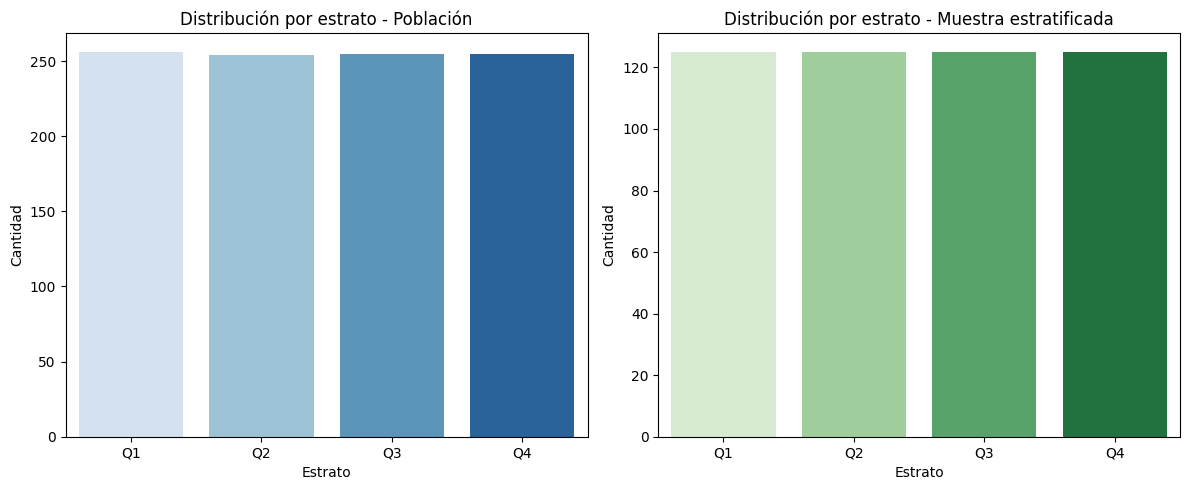

In [217]:

#Esto muestra si los estratos están balanceados proporcionalmente en tu muestra de 500 respecto a la población original.
# Figura lado a lado: población vs muestra
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Población
sns.countplot(data=df_copia_poblacion, x='Estratificacion', palette='Blues', ax=axes[0])
axes[0].set_title('Distribución por estrato - Población')
axes[0].set_ylabel('Cantidad')
axes[0].set_xlabel('Estrato')

# Muestra
sns.countplot(data=df_muestra_estrato, x='Estratificacion', palette='Greens', ax=axes[1])
axes[1].set_title('Distribución por estrato - Muestra estratificada')
axes[1].set_ylabel('Cantidad')
axes[1].set_xlabel('Estrato')

plt.tight_layout()
plt.show()


C:\Users\yamhile\AppData\Local\Temp\ipykernel_8540\1769407915.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_muestra_estrato, x='Estratificacion', y='T_CRmax', palette='Set2')


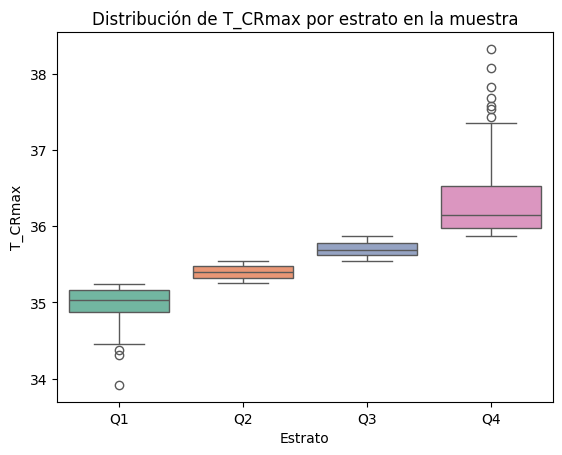

In [218]:
#Esto muestra cómo se distribuyen los valores de T_CRmax por estrato, para que veas que la muestra cubre bien los rangos térmicos.
sns.boxplot(data=df_muestra_estrato, x='Estratificacion', y='T_CRmax', palette='Set2')
plt.title('Distribución de T_CRmax por estrato en la muestra')
plt.xlabel('Estrato')
plt.ylabel('T_CRmax')
plt.show()

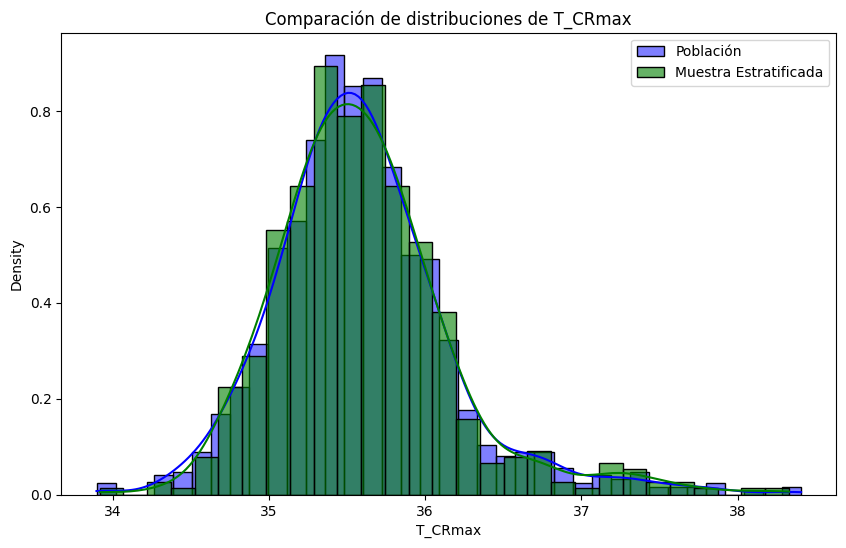

In [220]:
#Si querés comparar visualmente la distribución completa de temperatura entre población y muestra:
plt.figure(figsize=(10,6))
sns.histplot(df_copia_poblacion['T_CRmax'], label='Población', color='blue', kde=True, stat="density")
sns.histplot(df_muestra_estrato['T_CRmax'], label='Muestra Estratificada', color='green', kde=True, stat="density", alpha=0.6)
plt.title('Comparación de distribuciones de T_CRmax')
plt.xlabel('T_CRmax')
plt.legend()
plt.show()
